In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
%matplotlib inline

In [2]:
data = open("file.txt", "r", encoding="utf-8")
data = data.read()

In [3]:
def is_chinese(uchar):         
    if u'\u4e00' <= uchar<=u'\u9fff':
        return True
    else:
        return False

In [4]:
seg_list = jieba.cut(data, cut_all=False)  # 精确模式
#print("Default Mode: " + "/ ".join(seg_list))  

In [5]:
new_data=""
for d in data:
    if is_chinese(d):
        new_data+=d

In [6]:
stopwords = ['日月','該','致','災致','致型','校董','董','董致','董型','按','與','其他','型','我', '對', '\n',"集團","股份","或","資產","有限公司","年度","公司","準則","註","之","及","於","年月日","年","月","日","民國","至","在","係","所","以","馬","可","金","包含","評估","第號","機","未","新","為","已","可能","時","解釋","支付","當現"]
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
word = ["或有負債","不動產廠房及設備","馬達","其他綜合損益","無形資產"]
for w in word:
    jieba.add_word(w, freq=None, tag=None)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\j2831\AppData\Local\Temp\jieba.cache
Loading model cost 0.732 seconds.
Prefix dict has been built succesfully.


In [7]:
seg_list = jieba.cut(new_data, cut_all=False)
seg_list = list(seg_list)
wordDict = {}
for w in seg_list:
    if (w not in stopwords) and (w not in puncs):
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1

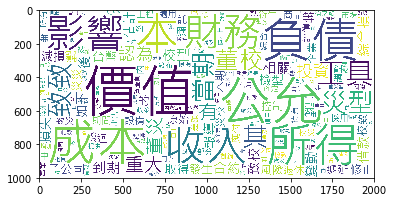

In [8]:
font = "msjh.ttc"
wordcloud = WordCloud(background_color="white",width=2000, height=1000, margin=2,font_path=font)
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [9]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)

In [10]:
ten[:10]

[('價值', 75),
 ('公允', 64),
 ('成本', 58),
 ('負債', 54),
 ('所得', 50),
 ('本', 45),
 ('收入', 39),
 ('影響', 36),
 ('財務', 35),
 ('工具', 31)]

In [11]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])


([<matplotlib.axis.XTick at 0x29df06fe940>,
 <a list of 10 Text xticklabel objects>)

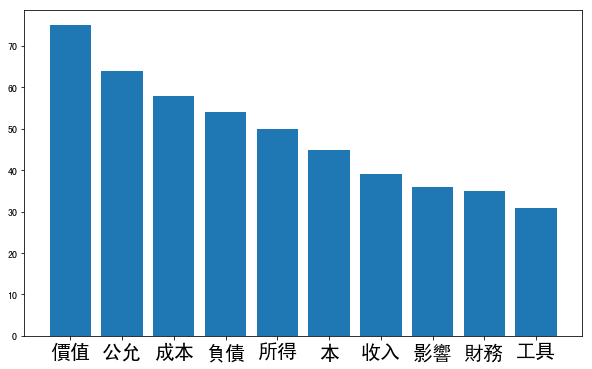

In [12]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # for Chinese characters
plt.figure(figsize=(10,6))
plt.bar(range(0,10),data)
plt.xticks(range(0,10),label,fontsize=20)